Classification Model to predict if a patient has tested postive for breast cancer or not by examining features recorded from cytology performed on the patient's cells. This Model was created with the help of the Wisconsin Breast Cancer from UCI machine learning repository, published by Dheeru Dua and Efi Karra Taniskidou School of Information and Computer Science, at the University of the California. With use a Support Vector Machine

In [1]:
# importing the required libraries 
# for Array functionality
import numpy as np
# for dataframes
import pandas as pd

# For SVMs and creating the model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn import svm

# for plotting purposes
import itertools
import matplotlib.pyplot as plot
import defs 

data = pd.read_csv(defs.DATASET_PATH + 'wisconsin_breast_cancer.csv')

In [2]:
# Displaying the first 15 records from the dataset to check if they 
# have been properly imported

data.head(15)

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


In [3]:
# Key Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
# Classification labels, 1 signifies a postive (malignant), 0 signifies a negative (benign)
print(data['class'].unique())

data['class'] = data['class'].replace([0], 'Negative')
data['class'] = data['class'].replace([1], 'Positive')

print(data['class'].unique())

[0 1]
['Negative' 'Positive']


In [5]:
# Dropping the id column because it unecessary and possibly 
data = data.drop(['id'], axis=1)

In [6]:
# Analyzing the distribution with mean for each attribute
distribution_of_data = pd.pivot_table(data, index=data['class'], aggfunc='mean')
distribution_of_data

,adhesion,chromatin,mitosis,nuclei,nucleoli,shape,single,size,thickness
class,,,,,,,,,
Negative,1.364629,2.100437,1.063319,1.346847,1.290393,1.443231,2.120087,1.325328,2.956332
Positive,5.547718,5.979253,2.589212,7.627615,5.863071,6.560166,5.298755,6.572614,7.195021


In [7]:
# Spliting the dataset into a training set (consisting of 500 of the 699 records) and a test set (contain the remaning 199 of 699 records)
train_set = data[0:500]
test_set = data[500:701]

# Sperating the class labels and the data atrributes for both the training and test set
x_train = train_set.drop(['class'], axis=1)
y_train = train_set['class']
x_test = test_set.drop(['class'], axis=1)
y_test = test_set['class']


print(len(train_set),len(test_set))

# Converting the pairs to numpy arrays for the training process
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# using the SimpleImputer model to deal with NaN values present
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train)

x_train = imp.transform(x_train)
x_test = imp.transform(x_test)

500 199


In [8]:
# Creating and training the classification model with the help of the Support Vector Machine
classification_model = svm.SVC(kernel='linear')
classification_model.fit(x_train,y_train)

SVC(kernel='linear')

In [9]:
# Making the trained model make predictions
predictions = classification_model.predict(x_test)
predictions

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positi

In [10]:

# Simple function that creates the visual representation of the confusion matrix with the neccessary parameters
def display_cm(CM, classes, title = "Confusion Matrix", cmap = plot.cm.Greens):
    plot.imshow(CM, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()

    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = 'd'
    # sets the threshold value to the max value from the confusion matrix
    threshold = CM.max()
    
    
    for x, y in itertools.product(range(CM.shape[0]), range(CM.shape[1])):
        plot.text(y,x, format(CM[x, y],fmt), horizontalalignment = 'left')
        color = 'red' if CM[x,y] > threshold else 'black'

    plot.tight_layout()
    # set x and y labels
    plot.ylabel('Actual Value')
    plot.xlabel('Predicted Value')

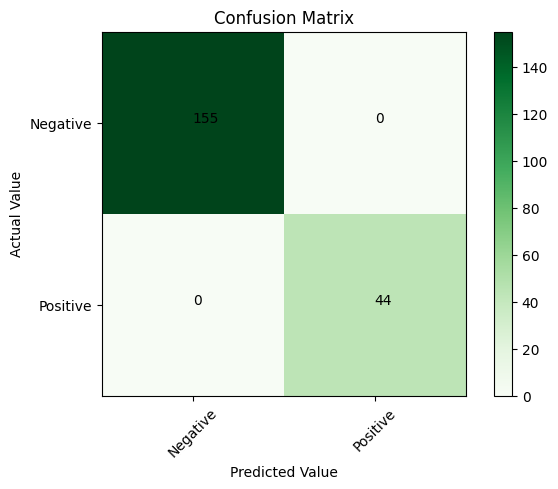

In [11]:

data_classes = np.array(['Negative', 'Positive'])
CM = confusion_matrix(y_test, predictions)
display_cm(CM, data_classes)

In [16]:

print(f"Model Accuracy is {(CM[0][0] + CM[1][1])/ (sum(CM[0]) + sum(CM[1])) * 100} %")

Model Accuracy is 100.0
